<a href="https://colab.research.google.com/github/DarshanDinni/learn_pytorch/blob/main/03_Computer_vision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing deep learning libraries
import torch
from torch import nn

# Importing computer vision libraries
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# Machine Learning libraries
from sklearn.model_selection import train_test_split

# tqdm -> make loops show a smart progress meter
from tqdm.auto import tqdm

In [46]:
# Set the device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

#**Get the data**

In [47]:
# Training data
train_data = datasets.FashionMNIST(
    root="data", # Set the directory to download the data
    train=True, # Boolean value to download the train or test data
    download=True, # Boolean value to download the data or not
    transform=ToTensor() # Used to convert the data to tensor
 )

# Testing data
test_data = datasets.FashionMNIST(
    root="data", # Set the directory to download the data
    train=False, # Boolean value to download the train or test data
    download=True, # Boolean value to download the data or not
    transform=ToTensor() # Used to convert the data to tensor
)

#**Exploring the data**

In [48]:
# Shape of the train and test data
len(train_data), len(test_data)

(60000, 10000)

In [49]:
# Class names / target labels
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

<Figure size 1000x400 with 0 Axes>

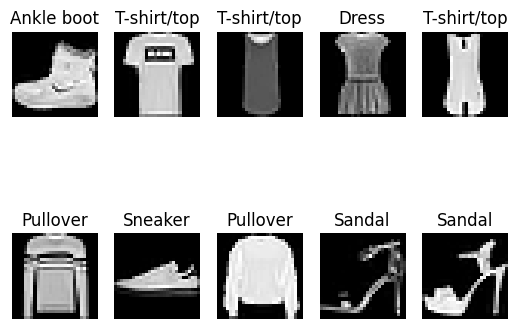

In [50]:
# Visualize the images
plt.figure(figsize=(10, 4))
fig, ax = plt.subplots(2, 5)
for i in range(10):
  image, label = train_data[i]

  # Select the appropriate subplot
  row = i // 5
  col = i % 5

  ax[row, col].set_title(class_names[label])
  ax[row, col].imshow(image.squeeze(), cmap='gray')

  ax[row, col].axis(False)


#**Data loader**

In [51]:
# Creating batches of data using DataLoader for training dataset
train_dataloader = DataLoader(train_data, 32, shuffle=True)

# Creating batches of data using DataLoader for testing dataset
test_dataloader = DataLoader(test_data, 32, shuffle=True)

print(f"Number of batches in train_dataloader: {len(train_dataloader)}")
print(f"Number of batches in test_dataloader: {len(test_dataloader)}")

Number of batches in train_dataloader: 1875
Number of batches in test_dataloader: 313


In [52]:
# Get the data for first batch
train_inputs, train_labels = next(iter(train_dataloader))

# Print the shape of the batch input and labels
train_inputs.shape, train_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

<Figure size 1000x600 with 0 Axes>

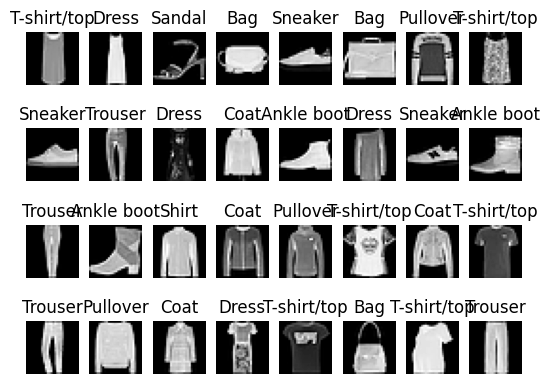

In [53]:
# Visualizing the 1st batch from train_dataloader
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(4, 8)

for i in range(32):
  image, label = train_inputs[i], train_labels[i]

  # Select the appropriate subplot
  row = i // 8
  col = i % 8

  ax[row, col].set_title(class_names[label])
  ax[row, col].imshow(image.squeeze(), cmap='gray')

  ax[row, col].axis(False)

#**Build a convolutional neural network (CNN) model**

CNN is a type of an algorithm used to recognize patterns in data.

In [55]:
# Building a TinyVgg model
class FashionMNISTModel(nn.Module):
  def __init__(self, input_units, hidden_units, output_units):
    super().__init__()
    # 1st Convolution Block
    self.conv_block_1 = nn.Sequential(
      # Convolution layer
      nn.Conv2d(in_channels=input_units,
                out_channels=hidden_units,
                kernel_size=3, # Also called as filter size, which refers to the dimensions of the sliding window over the input
                stride=1, # Stride indicates how many pixels the kernel should be shifted over at a time
                padding=1 # Padding conserves data at the borders of activation maps, which leads to better performance.
                ),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2) # this helps to gradually decreasing the spatial extent of the network
    )

    # 2nd Convolution Block
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )

    # Linear layer
    self.linear_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 7 * 7,
                  out_features=output_units)
    )

  # Overwriting the forward function
  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    return self.linear_layer(x)

#**Testing on dummy data to find the in_features value for the linear layer in the model**

In [35]:
dummy_data = torch.randn(1, 28, 28)
dummy_data.shape

torch.Size([1, 28, 28])

In [36]:
model_0 = FashionMNISTModel(1, # input_unit is number of colour channels present in our data
                            10, # number of hidden units
                            10 # Number of target classes
                            ).to(device)
model_0

FashionMNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [37]:
y_pred = model_0(dummy_data.to(device))

RuntimeError: ignored

As we can see that from above error after 1st convolution layer the size of tensor is reduced to [hidden_units, 14, 14].

After 2nd convolution layer the size of tensor is reduced to [hidden_units, 7, 7]

Finally when we flatten out the tensor to pass to the linear layer we need hidden_units * 7 * 7 = 490 units

In [72]:
# Instantiate the model
model_0 = FashionMNISTModel(1, # input_unit is number of colour channels present in our data
                            16, # number of hidden units
                            len(class_names) # As we have 10 different classes
                            ).to(device)

model_0

FashionMNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [73]:
# Setup the loss function and optimizer
loss_function = nn.CrossEntropyLoss()

LEARNING_RATE = 0.01
optimizer = torch.optim.Adam(model_0.parameters(), lr=LEARNING_RATE)

In [74]:
# Creating the accuracy function

# Calculate accuracy metrics
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [75]:
from timeit import default_timer as timer

# Function to calculate the model's execution time so that we can find how fast is our model performing
def calculate_time(start: float, end: float, device: str):
  print(f'Total time: {end - start} seconds on device {device}')

In [76]:
# Function to return the results of the model on the data passed
def model_eval(model: torch.nn.Module,
               data: torch.utils.data.DataLoader,
               loss_function=loss_function,
               accuracy_function=accuracy_fn,
               device=device):
  model.eval()

  loss, accuracy = 0, 0

  with torch.inference_mode():
    # Loop through the batches and predict the output on the model
    for X, y in tqdm(data):

      # Set the data to device
      X, y = X.to(device), y.to(device)

      # Perform the forward pass
      y_pred = model(X)

      # Calculate the loss and accuracy per batch
      loss += loss_function(y_pred, y)
      accuracy += accuracy_function(y, y_pred.argmax(dim=1))

    # Calculate the average loss and accuracy
    loss /= len(data)
    accuracy /= len(data)

  # Returning all the result of the model prediction
  return {
      "model_name": model.__class__,
      "model_loss": loss.item(),
      "model_accuracy": accuracy
  }

#**Training and Testing loop**

In [77]:
def trainLoop(model: torch.nn.Module, # model to train
               data: torch.utils.data.DataLoader, # Data to train on
               loss_function: torch.nn.Module, # Function to calculate the loss
               optimizer: torch.nn.Module, # nn Module to perform the optimization of neural network
               accuracy_function, # Function to calculate the accuracy
               device: str # Device on which we want to train the model "cpu" / "cuda"
               ):
  '''
  This function take the parameters and train the model on the data and prints the result of trained model
  '''

  '''
  As we will be calculating the training loss and accuracy per batch so we will set it 0 initially and after training we can perform average to get the training loss and accuracy
  for that epoch
  '''
  training_loss, training_accuracy = 0, 0

  # Setup model for training phase
  model.train()

  # Now we will train our model batch wise
  # Data loader returns input and labels, and we are using enumerate to get the batch number ie. batch 0, batch 1, batch 2..
  for batch, (X_train, y_train) in enumerate(data):

    # Setup the data to the appropriate device
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Perform the forward pass on the training data
    y_pred_train = model(X_train)

    # Calculate the training loss and accuracy per batch
    train_loss = loss_function(y_pred_train, y_train)
    training_loss += train_loss
    training_accuracy += accuracy_fn(y_train, y_pred_train.argmax(dim=1))

    # Set up the gradient to zero
    optimizer.zero_grad()

    # Perform the gradient descent
    train_loss.backward()

    # Take step towards the lowest gradient
    optimizer.step()

  # Calculate the average training loss and accuracy for the current epoch
  training_loss /= len(data)
  training_accuracy /= len(data)
  print(f"Training loss: {training_loss: .5f}, Training accuracy: {training_accuracy: .5f}")


def testLoop(model: torch.nn.Module, # model to train
              data: torch.utils.data.DataLoader, # Data to test on
               loss_function: torch.nn.Module, # Function to calculate the loss
               accuracy_function, # Function to calculate the accuracy
               device: str # Device on which we want to train the model "cpu" / "cuda"
            ):

  # Setup model for testing phase
  model.eval()

  with torch.inference_mode():
    '''
    As we will be calculating the testing loss and accuracy per batch so we will set it 0 initially and after testing we can perform average to get the testing loss and accuracy
    for that epoch
    '''
    testing_loss, testing_accuracy = 0, 0

    for X_test, y_test in data:
      # Set the data to the appropriate device
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Perform the forward pass on the data
      y_pred_test = model(X_test)

      # Calculate the testing loss and accuracy and accumulate through out the batches
      testing_loss += loss_function(y_pred_test, y_test)
      testing_accuracy += accuracy_fn(y_test, y_pred_test.argmax(dim=1))

    # Calculate the average training loss and accuracy for test batch data
    testing_loss /= len(test_dataloader)
    testing_accuracy /= len(test_dataloader)
    print(f"Testing loss: {testing_loss: .5f}, Testing accuracy: {testing_accuracy: .5f}")

In [78]:
# Set the number of epochs to loop
epochs = 6

# Start the timer
start = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}")

  # Training loop
  trainLoop(model=model_0, data=train_dataloader, loss_function=loss_function, optimizer=optimizer, accuracy_function=accuracy_fn, device=device)

  # Testing loop
  testLoop(model_0, test_dataloader, loss_function, accuracy_fn, device)

# Stop the timer
end = timer()

# Print the total time taken to train the model
calculate_time(start, end, device)

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 0
Training loss:  0.48232, Training accuracy:  82.49667
Testing loss:  0.44178, Testing accuracy:  84.19529
Epoch 1
Training loss:  0.38432, Training accuracy:  85.94833
Testing loss:  0.38395, Testing accuracy:  86.05232
Epoch 2
Training loss:  0.36445, Training accuracy:  86.59667
Testing loss:  0.39693, Testing accuracy:  85.62300
Epoch 3
Training loss:  0.36019, Training accuracy:  86.70833
Testing loss:  0.38769, Testing accuracy:  85.93251
Epoch 4
Training loss:  0.35141, Training accuracy:  87.07333
Testing loss:  0.36459, Testing accuracy:  86.73123
Epoch 5
Training loss:  0.35412, Training accuracy:  86.87167
Testing loss:  0.36308, Testing accuracy:  86.62141
Total time: 76.6222999659999 seconds on device cuda
